# Customer Shopping Trends Dataset

#### 데이터셋 설명
- 이 데이터셋은 실제 고객 쇼핑 경험을 시뮬레이션하기 위해 ChatGPT를 사용하여 생성된 합성 데이터셋입니다. 
- 이 데이터셋은 고객 쇼핑 선호도와 관련된 다양한 기능을 포함하고 있습니다.

#### 데이터셋 구조
- Customer ID (고객 식별자) - 각 고객을 식별하는 고유한 식별자
- Age (연령) - 고객의 연령
- Gender (성별) - 고객의 성별 (남성/여성)
- Item Purchased (구매한 항목) - 고객이 구매한 항목
- Category (카테고리) - 구매한 항목의 카테고리
- Purchase Amount (USD) (구매 금액) - 구매 금액 (미국 달러)
- Location (위치) - 구매가 이루어진 장소
- Size (크기) - 구매한 항목의 크기
- Color (색상) - 구매한 항목의 색상
- Season (시즌) - 구매가 이루어진 계절
- Review Rating (리뷰 평가) - 고객이 구매한 항목에 대해 제공한 평가
- Subscription Status (구독 상태) - 고객이 구독 중인지 여부 (예/아니요)
- Shipping Type (배송 유형) - 고객이 선택한 배송 유형
- Discount Applied (할인 적용) - 구매에 할인이 적용되었는지 여부 (예/아니요)
- Promo Code Used (프로모션 코드 사용) - 구매에 프로모션 코드가 사용되었는지 여부 (예/아니요)
- Previous Purchases (이전 구매) - 현재 거래를 제외한 고객이 상점에서 완료한 거래의 총 수
- Payment Method (결제 방법) - 고객의 가장 선호하는 결제 방법
- Frequency of Purchases (구매 빈도) - 고객이 구매하는 빈도 (예: 매주, 매 2주, 매월)


#### 분석 흐름 참고 kaggle
- https://www.kaggle.com/code/iamsouravbanerjee/shopping-trends-unveiled-eda-for-beginners

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

## Loading the Dataset

In [2]:
df = pd.read_csv('./raw_data/customer_shopping_trends/shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Checking the shape of the Dataset

In [3]:
df.shape

(3900, 18)

## Checking the number of Columns in the Dataset

In [4]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

## Information about the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Checking if there are any null values present in the dataset or not ?

In [7]:
df.isnull().sum() #null 값 없음

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Checking if there are any duplicate values present in the dataset or not ?

In [8]:
df.duplicated().sum()

0

## Data Visualization

#### 캐글 best code 참고

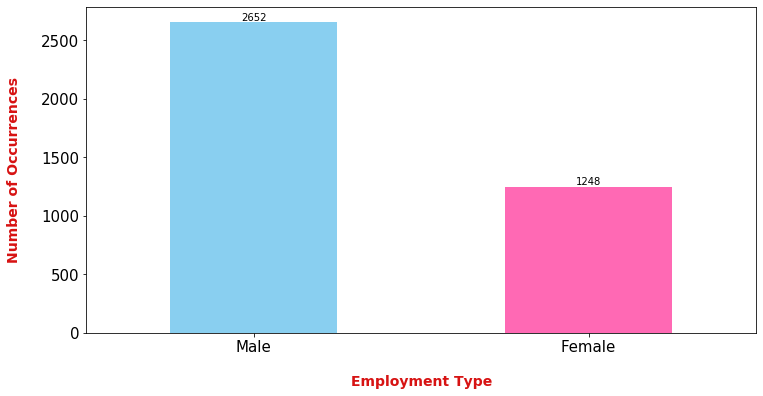

In [9]:
plt.figure(figsize = (12, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

# 막대의 높이 정수로 변환 후 표시 
for p in ax.patches: # ax.patches -> 그래프에 포함된 모든 그래픽 요소를 포함하는 리스트 또는 컬렉션
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

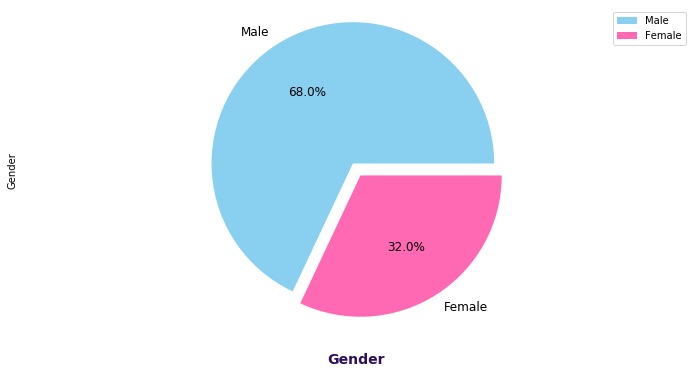

In [10]:
plt.figure(figsize = (12, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

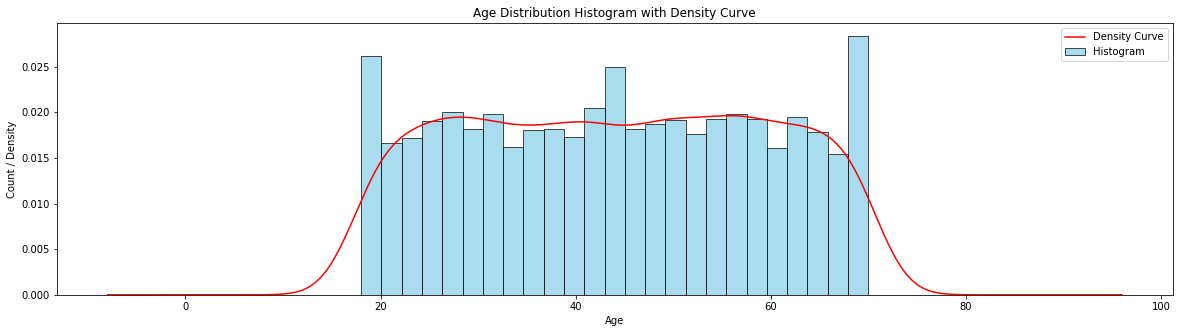

In [11]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

In [12]:
df['Item Purchased'].value_counts()

Pants         171
Blouse        171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Coat          161
Sunglasses    161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

Text(0.5, 1.0, 'Item Purchased\n')

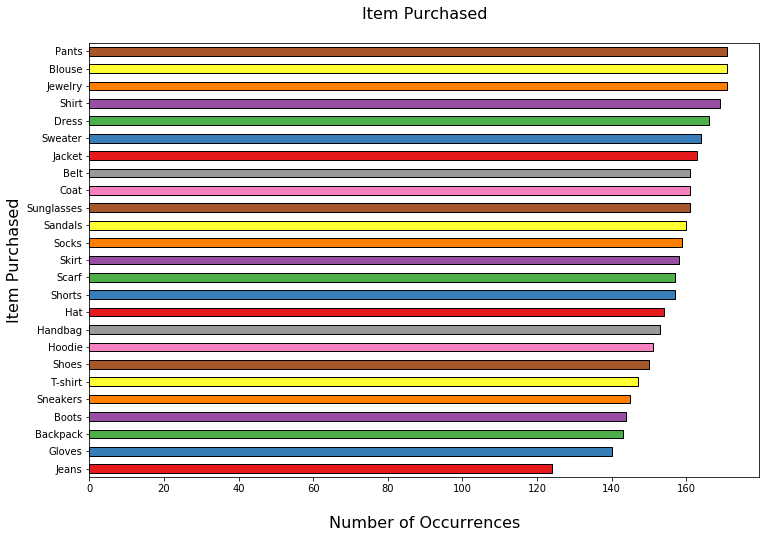

In [13]:
# Item Purchased
plt.figure(figsize = (12, 8))

df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('Set1'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)

In [14]:
df['Category'].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

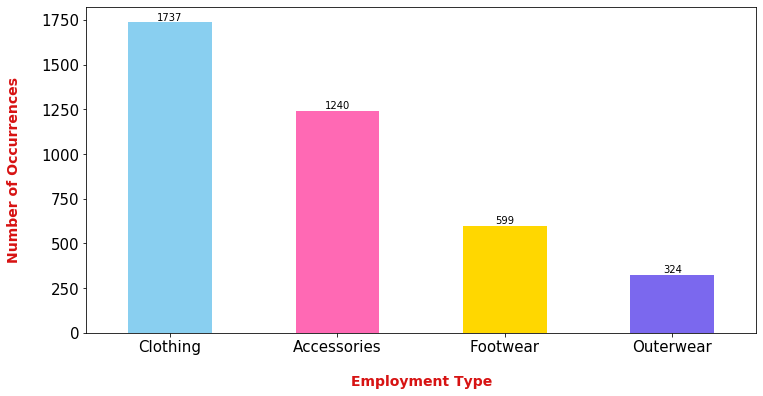

In [15]:
# Category
plt.figure(figsize = (12, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

# 막대의 높이 정수로 변환 후 표시 
for p in ax.patches: # ax.patches -> 그래프에 포함된 모든 그래픽 요소를 포함하는 리스트 또는 컬렉션
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [16]:
df['Location'].value_counts()

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
Nevada            87
New York          87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
New Mexico        81
Missouri          81
Mississippi       80
Georgia           79
Indiana           79
Arkansas          79
Kentucky          79
Connecticut       78
North Carolina    78
Virginia          77
Texas             77
Tennessee         77
Ohio              77
Maine             77
South Carolina    76
Colorado          75
Wisconsin         75
Oklahoma          75
Pennsylvania      74
Oregon            74
Michigan          73
Washington        73
Massachusetts     72
Alaska            72
Utah              71
New Hampshire     71
Wyoming           71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

Text(0.5, 1.0, 'Location\n')

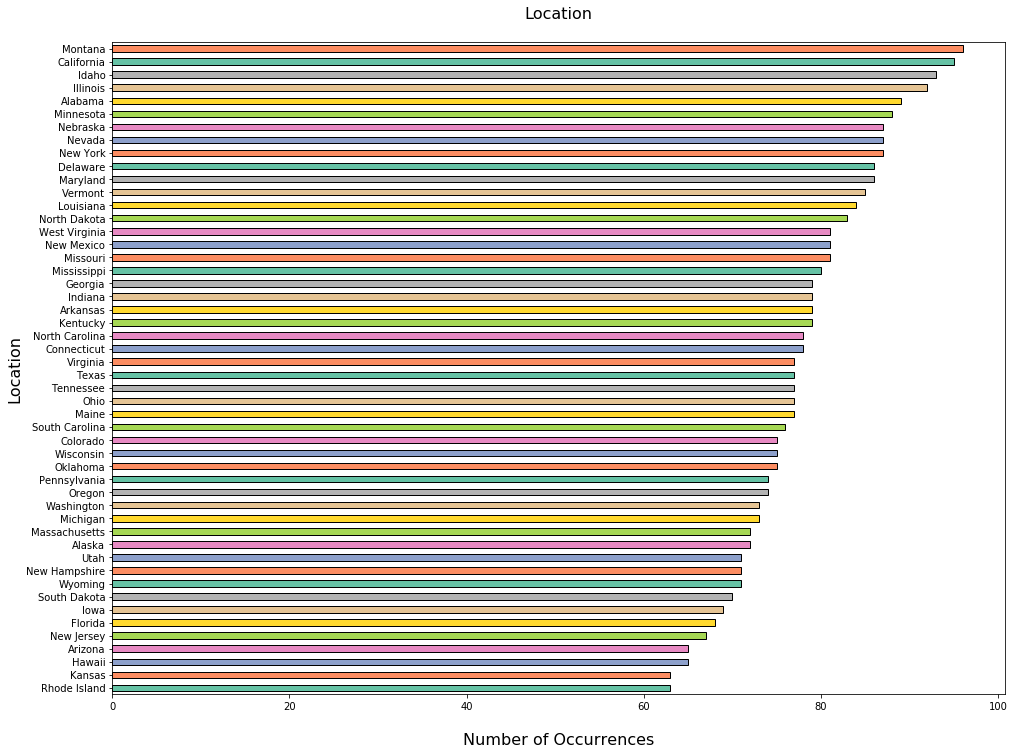

In [17]:
# Location
plt.figure(figsize = (16, 12))

df["Location"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('Set2'), edgecolor = 'black')
plt.ylabel('Location', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Location\n', fontsize = 16)

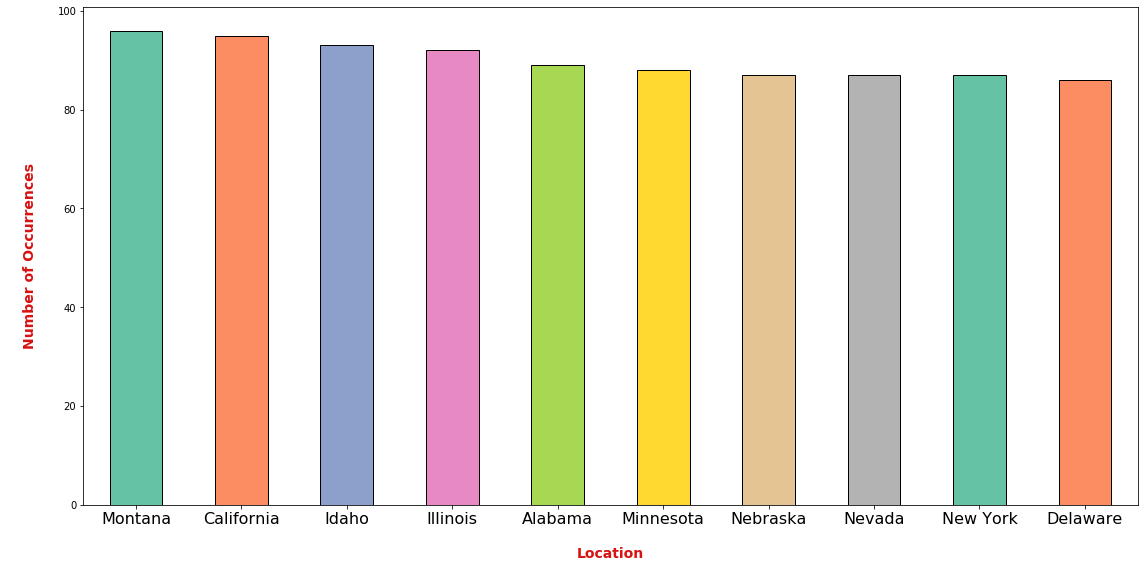

In [18]:
plt.figure(figsize = (16, 8))

df["Location"].value_counts().sort_values(ascending = False)[:10].plot(kind = 'bar', color = sns.color_palette('Set2'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()

In [19]:
df["Size"].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

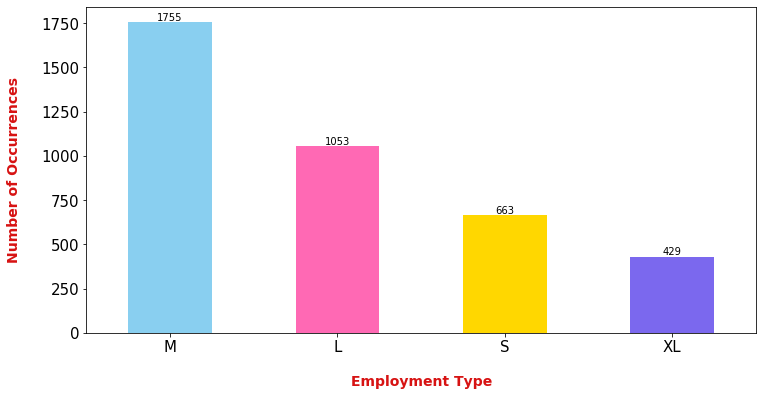

In [20]:
# Size
plt.figure(figsize = (12, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('M', 'L', 'S', 'XL'))


for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [21]:
df['Color'].value_counts()

Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Violet       166
Cyan         166
Gray         159
Maroon       158
Orange       154
Pink         153
Charcoal     153
Blue         152
Magenta      152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: Color, dtype: int64

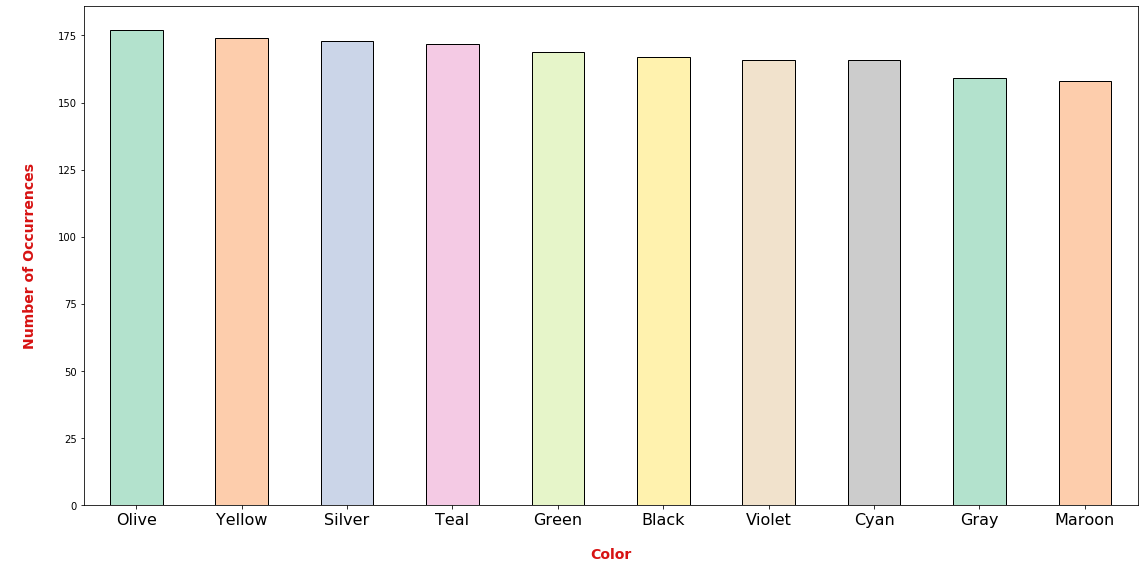

In [22]:
# Color Top 10
plt.figure(figsize = (16, 8))

df["Color"].value_counts().sort_values(ascending = False)[:10].plot(kind = 'bar', color = sns.color_palette('Pastel2'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()

In [23]:
df['Season'].value_counts()

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

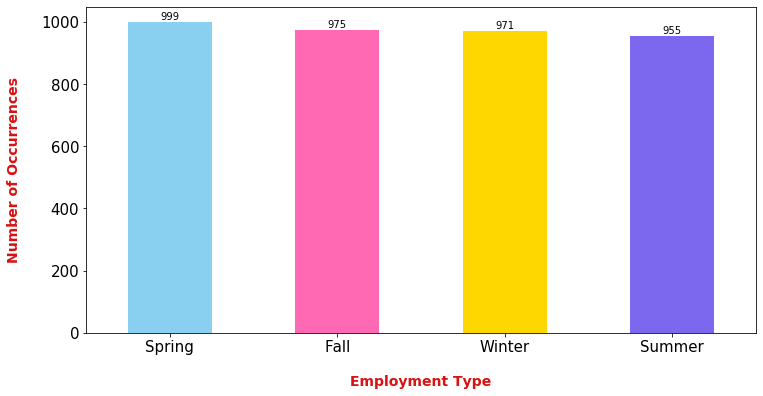

In [24]:
# Season
plt.figure(figsize = (12, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))


for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [25]:
df['Review Rating'].value_counts()

3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.5    156
3.7    156
2.7    154
3.3    152
3.2    152
3.6    149
4.1    148
4.7    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: Review Rating, dtype: int64

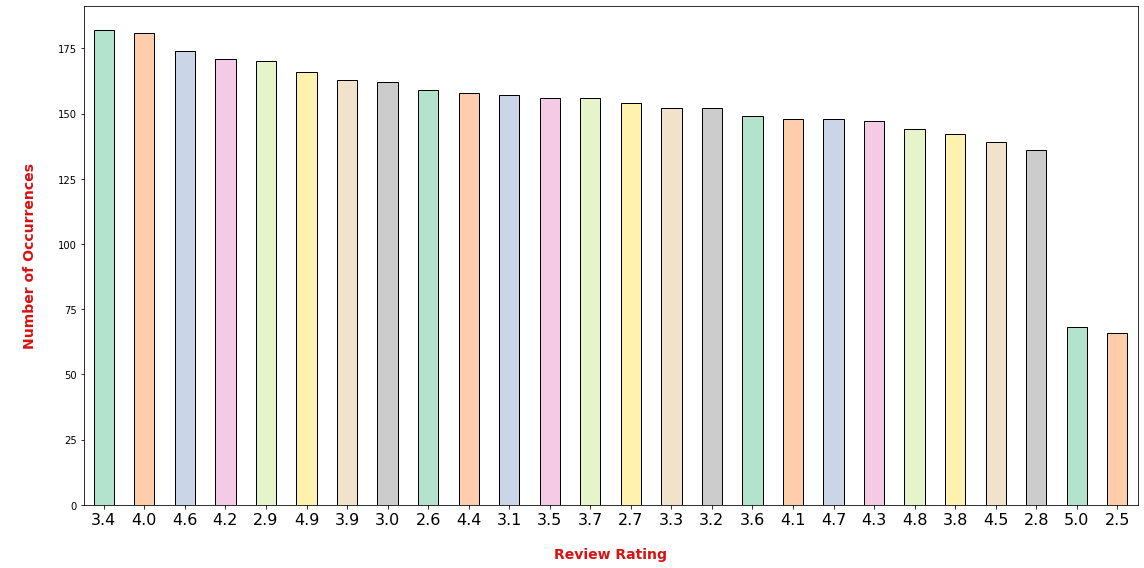

In [26]:
# Review Rating Top 5
plt.figure(figsize = (16, 8))

df["Review Rating"].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('Pastel2'), edgecolor = 'black')
plt.xlabel('Review Rating', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()

In [27]:
df['Subscription Status'].value_counts()

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

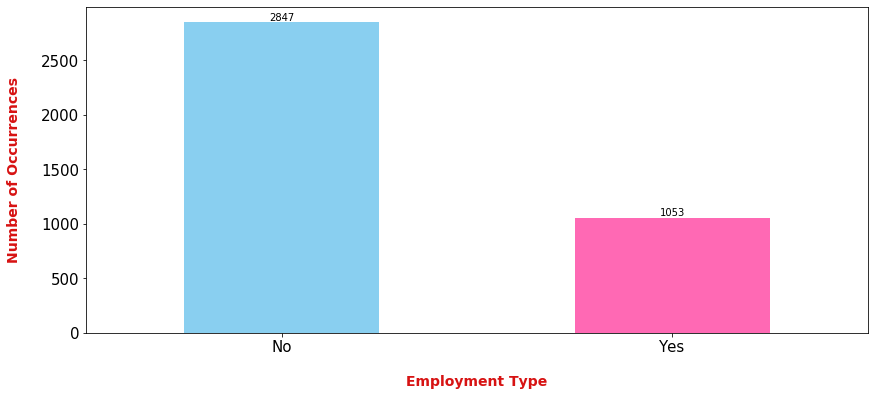

In [28]:
# Subscription Status
plt.figure(figsize = (14, 6))
ax = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))


for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [29]:
df['Shipping Type'].value_counts()

Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping Type, dtype: int64

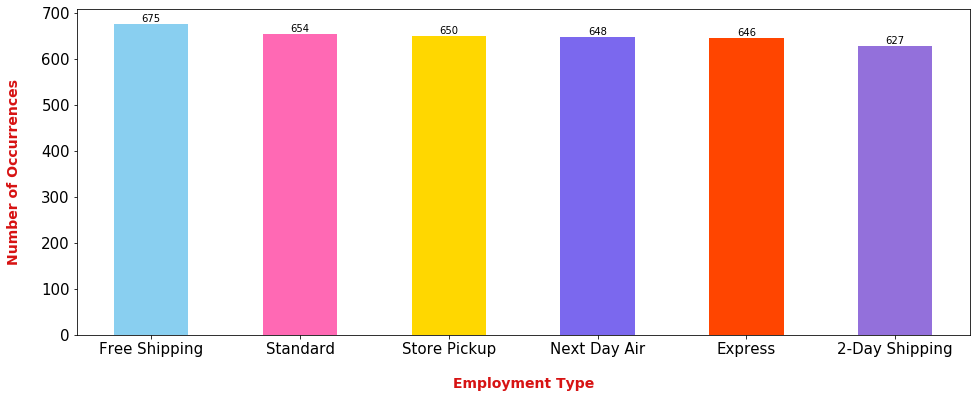

In [30]:
# Shipping Type
plt.figure(figsize = (16, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))


for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [31]:
df['Discount Applied'].value_counts()

No     2223
Yes    1677
Name: Discount Applied, dtype: int64

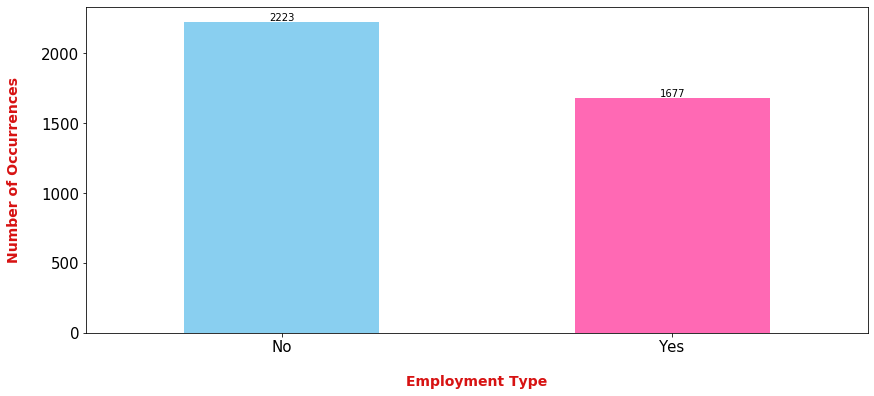

In [32]:
# Discount Applied
plt.figure(figsize = (14, 6))
ax = df["Discount Applied"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))


for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [33]:
df['Promo Code Used'].value_counts()

No     2223
Yes    1677
Name: Promo Code Used, dtype: int64

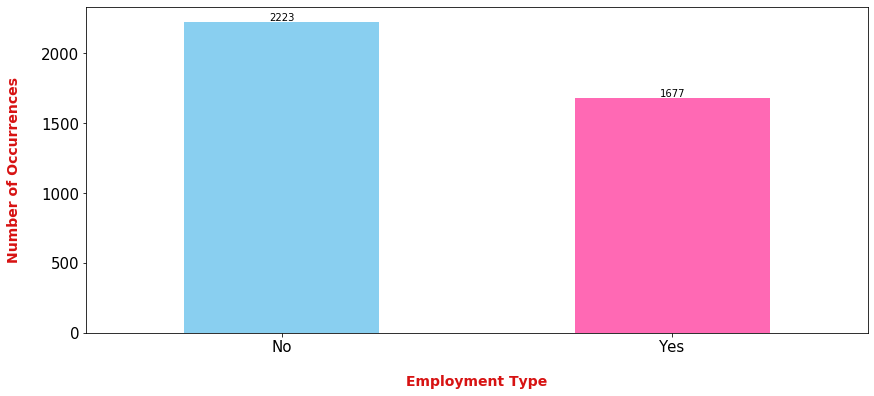

In [34]:
# Promo Code Used
plt.figure(figsize = (14, 6))
ax = df["Promo Code Used"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))


for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [35]:
df['Previous Purchases'].value_counts()

31    97
21    96
14    92
4     91
3     91
24    91
48    90
47    90
6     87
5     87
18    84
45    83
1     83
20    83
42    83
11    82
40    82
33    82
30    82
32    81
39    81
28    80
25    79
12    79
34    79
19    78
27    78
37    78
46    78
50    77
26    77
10    76
23    73
15    73
2     72
44    72
36    71
38    70
16    70
41    70
13    69
29    69
17    67
8     67
7     65
22    65
9     65
43    64
35    63
49    58
Name: Previous Purchases, dtype: int64

In [36]:
df['Payment Method'].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

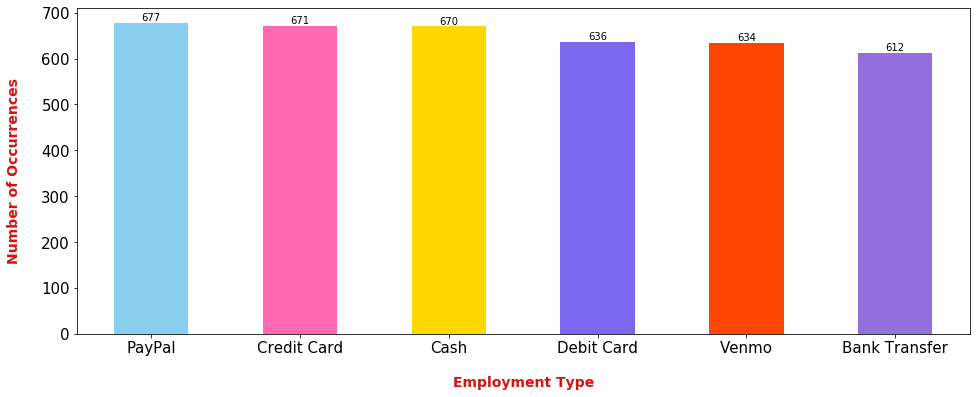

In [37]:
# Payment Method
plt.figure(figsize = (16, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('PayPal', 'Credit Card', 'Cash', 'Debit Card', 'Venmo', 'Bank Transfer'))


for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [38]:
df['Frequency of Purchases'].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

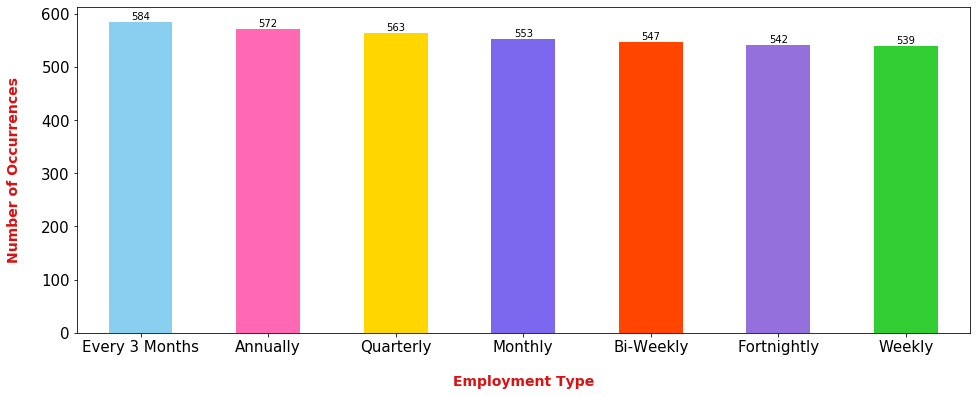

In [39]:
# Frequency of Purchases
plt.figure(figsize = (16, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))


for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

## What is the average age of customers in the dataset ?

In [40]:
# dataset의 평균 나이는 44세이다.
avg_age = df['Age'].mean()
print('Average age: ', round(avg_age,2))

Average age:  44.07


## What is the most common item purchased ?

In [41]:
# Blouse를 가장 많이 산다.
most_common = df['Item Purchased'].mode()[0] # mode() -> 해당 열에서 가장 빈도가 높은 값을 반환, 모든 최빈값 중에서 첫번째 값 
print('Most Common Item: ', most_common)

Most Common Item:  Blouse


## What is the total purchase amount for each category ?

In [42]:
# 옷에 가장 많이 쓰는 것을 알 수 있다.
total_purchase = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
total_purchase

Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

## What is the average review rating for male customers and female customers separately ?

In [43]:
# male
avg_rating_male = df[df.Gender == 'Male']['Review Rating'].mean()
# female
avg_rating_female = df[df.Gender == 'Female']['Review Rating'].mean()

print('Average Review Rating For Male: ', round(avg_rating_male,2))
print('Average Review Rating For Female: ', round(avg_rating_female,2))

Average Review Rating For Male:  3.75
Average Review Rating For Female:  3.74


## What is the most common payment method used by customers ?

In [44]:
# 가장 많이 쓰는 지불 방법은 PayPal 이다.
most_common_payment_method = df['Payment Method'].mode()[0]
print('Most Common Payment Method: ', most_common_payment_method)

Most Common Payment Method:  PayPal


## What is the median purchase amount (USD) ?

In [45]:
median_purchase_amount = df['Purchase Amount (USD)'].median()
print('Median Of Purchase Amount (USD): ', median_purchase_amount)

Median Of Purchase Amount (USD):  60.0


## How many customers have opted for the Subscription ?

In [46]:
sub_cnt = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print('Number of Subscription: ', sub_cnt)

Number of Subscription:  1053


## What is the average purchase amount for customers with a subscription status of 'Yes' and 'No' ?

In [47]:
# Yes
avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
# No
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()

print('Average Purchase Subscription Yes: ', round(avg_purchase_subscription_yes, 2))
print('Average Purchase Subscription No: ', round(avg_purchase_subscription_no, 2))

Average Purchase Subscription Yes:  59.49
Average Purchase Subscription No:  59.87


## What is the most common season for purchases ?

In [48]:
# 봄에 가장 많은 것을 알 수 있다.
most_common_season = df['Season'].mode()[0]
print('Most Common Season: ', most_common_season)

Most Common Season:  Spring


## What is the total purchase amount for each gender ?

In [49]:
# 남자 고객의 구매양이 여자 고객보다 2배 이상 많은 것을 알 수 있다.
df.groupby('Gender')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

Gender
Male      157890
Female     75191
Name: Purchase Amount (USD), dtype: int64

## What is the average age of customers who made purchases in the Spring season ?

In [50]:
# 봄 시즌에 구매한 고객들의 평균 나이는 약 44세이다.
avg_age_spring = df[df.Season == 'Spring']['Age'].mean()
print("Average Age of Customers in the Summer Season:", round(avg_age_spring, 2))

Average Age of Customers in the Summer Season: 44.58


## What is the average age of customers who made purchases in the Summer season ?

In [51]:
# 여름 시즌에 구매한 고객들의 평균 나이는 약 44세이다.
avg_age_summer = df[df.Season == 'Summer']['Age'].mean()
print("Average Age of Customers in the Summer Season:", round(avg_age_summer, 2))

Average Age of Customers in the Summer Season: 43.97


## What is the average age of customers who made purchases in the Fall season ?

In [52]:
# 가을 시즌에 구매한 고객들의 평균 나이는 약 44세이다.
avg_age_fall = df[df.Season == 'Fall']['Age'].mean()
print("Average Age of Customers in the Fall Season:", round(avg_age_fall, 2))

Average Age of Customers in the Fall Season: 44.39


## What is the average age of customers who made purchases in the Winter season ?

In [53]:
# 겨울 시즌에 구매한 고객들의 평균 나이는 약 43세이다.
avg_age_winter = df[df.Season == 'Winter']['Age'].mean()
print("Average Age of Customers in the Winter Season:", round(avg_age_winter, 2))

Average Age of Customers in the Winter Season: 43.31


## How many customers used a promo code for their purchase ?

In [54]:
promo_code_cnt = df[df['Promo Code Used'] == 'Yes']['Promo Code Used'].count()
print('Number of Customer used promo code: ', promo_code_cnt)

Number of Customer used promo code:  1677


## What is the average age of customers who used a discount?

In [55]:
# 할인을 가장 많이 한 나이대는 54세이다.
avg_age_used_discount = df[df['Discount Applied'] == 'Yes']['Age'].mode()[0]
print('Average of Customer who used discount: ', avg_age_used_discount)

Average of Customer who used discount:  54


## What is the average purchase amount for customers who used a discount ?

In [56]:
# 할인을 받아 산 평균 금액은 59.28이다.
avg_purchase_discount = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
print('Average Purchase Amount who used a discount: ', round(avg_purchase_discount, 2))

Average Purchase Amount who used a discount:  59.28


## What is the most common category teenager  purchased ?

In [57]:
# 10대가 가장 많이 사는 품목은 "옷" 이다.
most_common_category_teenager = df[df['Age'] < 20]['Category'].mode()[0]
print('Most Common Category by Teenager: ', most_common_category_teenager)

Most Common Category by Teenager:  Clothing


## What is the most common category twenties purchased ?

In [58]:
# 20대가 가장 많이 사는 품목은 "옷" 이다.
most_common_category_twenties = df[df['Age'] < 30]['Category'].mode()[0]
print('Most Common Category by Twenties: ', most_common_category_twenties)

Most Common Category by Twenties:  Clothing


## What is the most common category thirties purchased ?

In [59]:
# 30대가 가장 많이 사는 품목은 "옷" 이다.
most_common_category_thirties = df[df['Age'] < 40]['Category'].mode()[0]
print('Most Common Category by Thirties: ', most_common_category_thirties)

Most Common Category by Thirties:  Clothing


## What is the total purchase amount for customers in each location ?

In [60]:
total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum()
print('Total Purchase Amount Each location')
print(total_purchase_by_location)

Total Purchase Amount Each location
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee   

## What is the average purchase amount for each color of items ?

In [61]:
# 무채색이 높을 줄 알았는데 무채색 뿐 아니라 Green, Cyan도 높은 것을 알 수 있다.
avg_purchase_by_color = avg_purchase_by_color = df.groupby('Color')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
print("Average Purchase Amount by Color")
print(avg_purchase_by_color)

Average Purchase Amount by Color
Color
Green        65.704142
White        62.640845
Gray         62.490566
Cyan         61.891566
Violet       61.716867
Gold         61.007246
Orange       60.889610
Teal         60.808140
Charcoal     60.633987
Pink         60.588235
Beige        60.414966
Purple       60.013245
Maroon       59.525316
Red          59.317568
Yellow       59.241379
Peach        59.187919
Lavender     59.129252
Brown        59.063830
Black        58.401198
Olive        58.146893
Magenta      57.131579
Blue         56.953947
Silver       56.832370
Indigo       56.251701
Turquoise    55.613793
Name: Purchase Amount (USD), dtype: float64


## How many customers have made a purchase in each category ?

In [62]:
purchase_category = df['Category'].value_counts()
print('Purchase Each Category')
print(purchase_category)

Purchase Each Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64


## What is the correlation between a customer's age and their total previous purchases? Calculate the Pearson correlation coefficient.

In [63]:
# 고객의 나이와 이전 구매 금액 사이의 상관 계수는 0.04로 두 변수간 선형 관계가 약하다.
corr_age_previous_purchases = df['Age'].corr(df['Previous Purchases'], method='pearson')
print("Pearson Correlation between Age and Previous Purchases:", corr_age_previous_purchases)

Pearson Correlation between Age and Previous Purchases: 0.04044453114289461


## Visualization by  All Variables Pearson correlation coefficient.

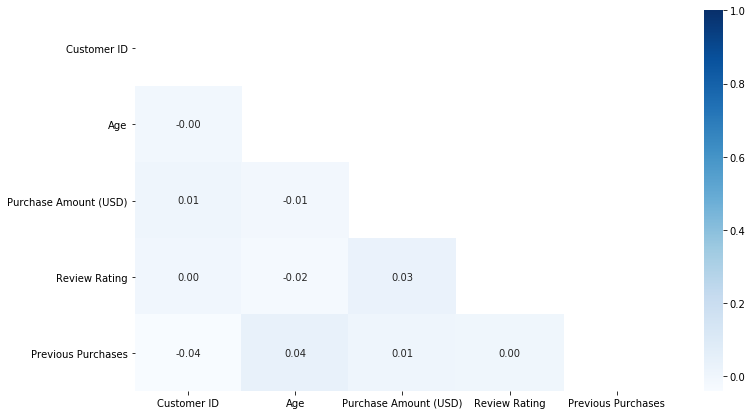

In [64]:
plt.figure(figsize=(12,7))

df_corr = df.corr()

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

## Histogram of Age Distribution

- 나이 연령대 분포를 알 수 있음
- 다양한 나이대에 속하는 개인 수를 알 수 있음
- 일반적인 연령 그룹 식별하는 데 유용

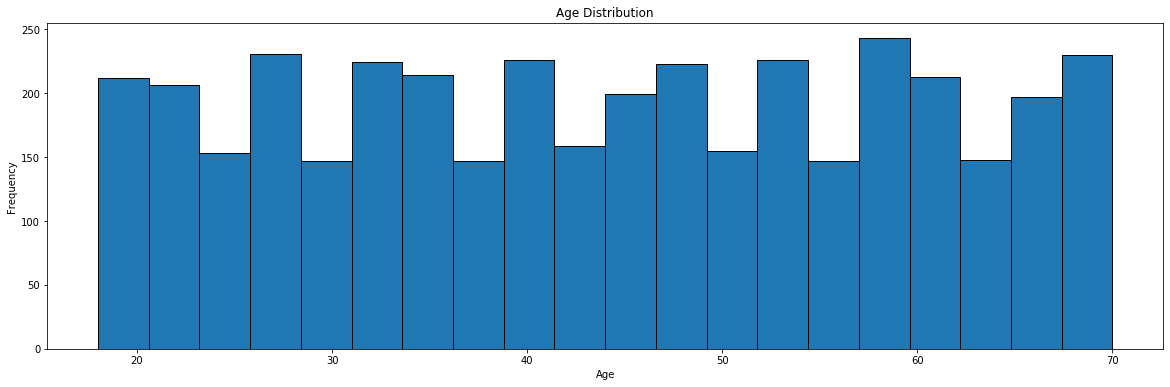

In [65]:
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Scatter Plot of Age vs. Review Rating

- 점의 분포 : 어떤 연령대에서 가장 많은 리뷰 평점이 나타나는지 알 수 있음
- 점의 밀도 : 점들이 얼마나 집중되어 있는지 확인할 수 있음, 점들이 모여 있으면 밀도가 높다고 볼 수 있으며 이는 해당 연령대에서 리뷰 평점의 변동성이 낮음을 나타낼 수 있음
- 상관 관계 : scatter plot은 두 변수 간의 상관 관계를 시각화할 때 유용함

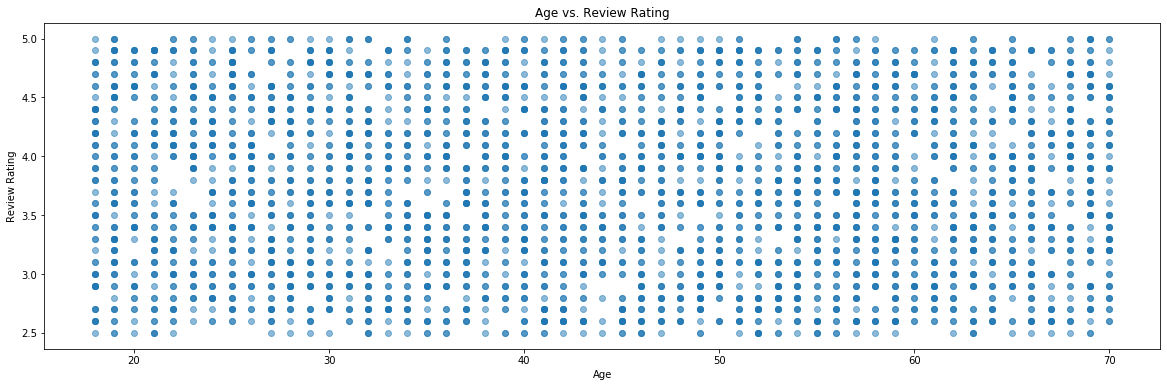

In [66]:
plt.figure(figsize = (20, 6))
plt.scatter(df['Age'], df['Review Rating'], alpha=0.5)
plt.title('Age vs. Review Rating')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.show()

## Stacked Bar Chart of Subscription Status by Gender

- 각 성별에서 구독 상태에 따른 분포를 알 수 있음
- 성별간 구독 상태의 비교를 할 수 있음
- 어떤 성별이 구독 상태에 따라 더 많은 비율을 차지하는지 확인할 수 있음

<Figure size 1440x432 with 0 Axes>

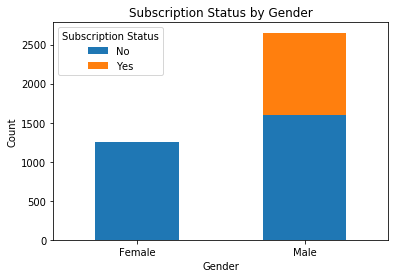

In [67]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

## Violin Plot of Review Rating by Category

- 각 카테고리 별로 리뷰 평점 데이터 분포를 알 수 있음
- 플롯의 너비는 데이터 분포의 밀도를 나타냄
    - 넓은 부분은 데이터가 밀집되어 있음을 나타내고 좁은 부분은 데이터가 희소하다는 것을 나타냄
- 바이올린 플롯 내부의 중앙 상자는 데이터의 중앙값(중앙에 위치하는 데이터의 평균)을 나타냄



- 어떤 카테고리에서 리뷰 평점이 가장 높은지 또는 낮은지 확인 가능
- 카테고리 간 리뷰 평점 분포의 비교 가능
- 각 카테고리의 데이터 분포 대칭성, 밀도 및 이상치 여부 확인 가능

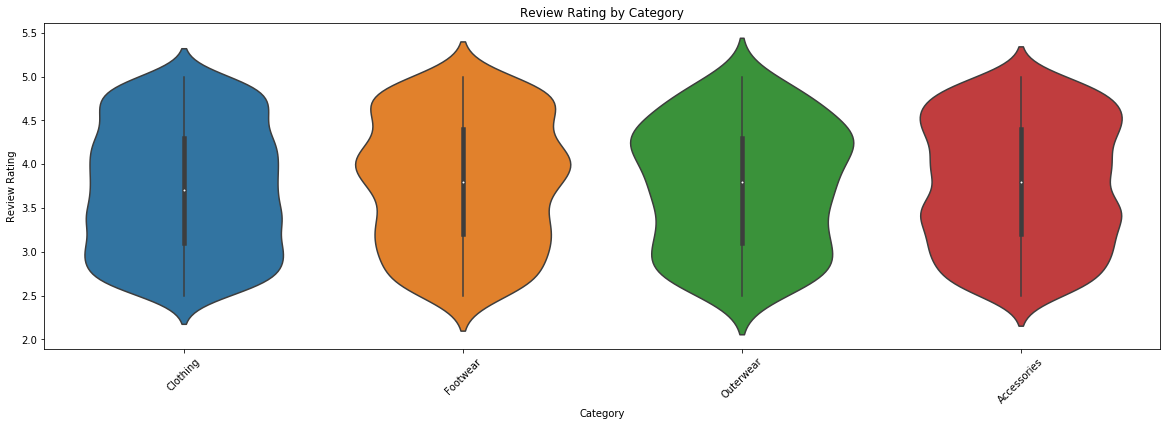

In [68]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Category', y='Review Rating', data=df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()

## Bar Plot of Payment Method by Season

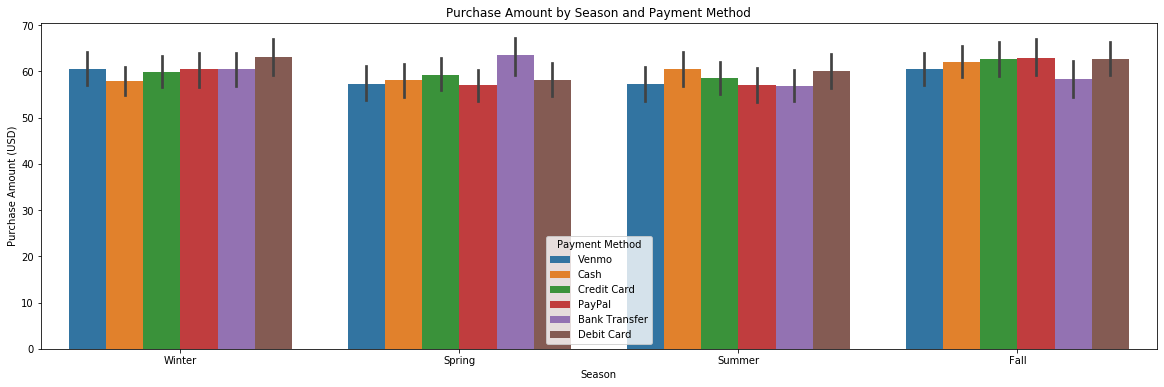

In [69]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)

plt.show()

## Area Plot of Total Purchase Amount by Category

- Area plot은 연속적인 데이터의 분포를 비교할 때 유용, 주로 시간에 따른 변화를 나타낼 때 사용함
- ex) 카테고리별 총 구매액의 시간에 따른 변화를 비교하거나, 다른 범주 데이터의 분포를 비교할 때 사용할 수 있음



- 카테고리 간 총 구매액 비교 : 각 카테고리의 구매액 합계를 비교해 어떤 카테고리가 가장 많은 구매액을 차지하는지 확인 가능


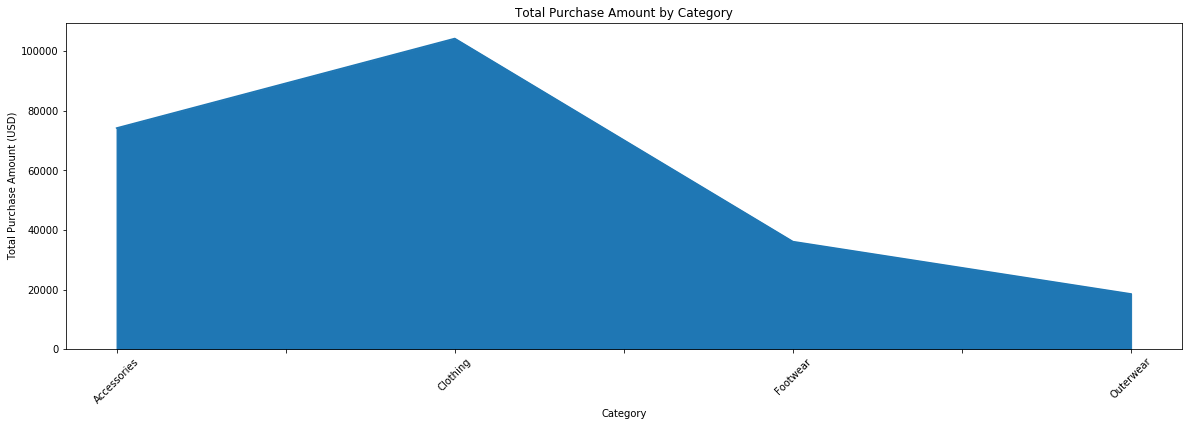

In [70]:
plt.figure(figsize=(20, 6))
category_purchase_total = df.groupby('Category')['Purchase Amount (USD)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

## Hexbin Plot of Age vs. Purchase Amount

- Hexbin plot은 대규모 데이터셋에서 산점도 밀도를 효과적으로 시각화
- 데이터의 패턴과 밀도 분포를 확인할 때 사용
- 특히 산점도의 점이 많아서 밀도를 정확하게 파악하기 어려울 때 유용, 두 변수 간의 관계를 파악하기 위해 사용됨


- age와 purchase amount의 값들이 어떻게 분포되어 있는지 알 수 있음
- 데이터가 밀집되어 있는 영역을 집중적으로 표시하고 데이터 밀도의 변화를 시각적으로 확인할 수 있음

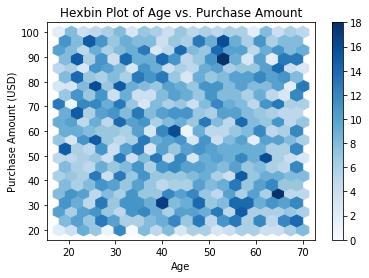

In [71]:
plt.hexbin(df['Age'], df['Purchase Amount (USD)'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar()
plt.show()

## KDE Plot of Review Rating by Gender

- 주로 연속형 변수 분포를 시각화할 때 사용
- 다른 그룹 간의 분포 차이를 비교하거나 밀도를 추정하기 위해 사용됨
- 특히 변수의 분포를 확인하고 데이터의 패턴을 파악하려는 경우 유용


- 여러 그룹 간에 review rating의 분포를 비교할 수 있음
- 각 성별에 대한 곡선이 어떻게 다르며 어던 성별이 어떤 review rating 범위에서 더 밀집되어 있는지 비교할 수 있음
- 곡선 아래 영역은 해당 범위의 밀도를 나타냄
- 따라서 어느 범위에서 어떤 성별이 더 높은 밀도를 가지고 있는지 확인할 수 있음

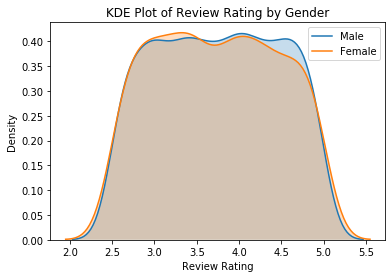

In [72]:
sns.kdeplot(df[df['Gender'] == 'Male']['Review Rating'], label='Male', shade=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review Rating'], label='Female', shade=True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend()
plt.show()